# Bank loan prediction 

# `problem statement`

# Perform machine learning algorithms to predict the 
# `loan approval status prediction` on some features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

* There are 895 null values in person_emp_length column
* There are 3116 null values in loan_int_rate column

### Replaceing null values with median of loan_int_rate

In [6]:
print(df['loan_int_rate'].mean())
print(df['loan_int_rate'].median())

11.01169489224439
10.99


In [7]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [8]:
df['loan_int_rate'].isnull().sum()

0

### Replaceing null values with median of person_emp_length column

In [9]:
print(df['person_emp_length'].mean())
print(df['person_emp_length'].median())

4.789686296787225
4.0


In [10]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].median())

In [11]:
df['person_emp_length'].isnull().sum()

0

In [12]:
# Null values are treated
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
# finding duplicate rows in dataframe
df.duplicated(keep='first').sum()

165

In [14]:
# droping duplicates
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.duplicated(keep='first').sum()

0

# Univariate analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [17]:
df_obj=df.select_dtypes('object')

In [18]:
df_int=df.select_dtypes(include=('int64','float64'))

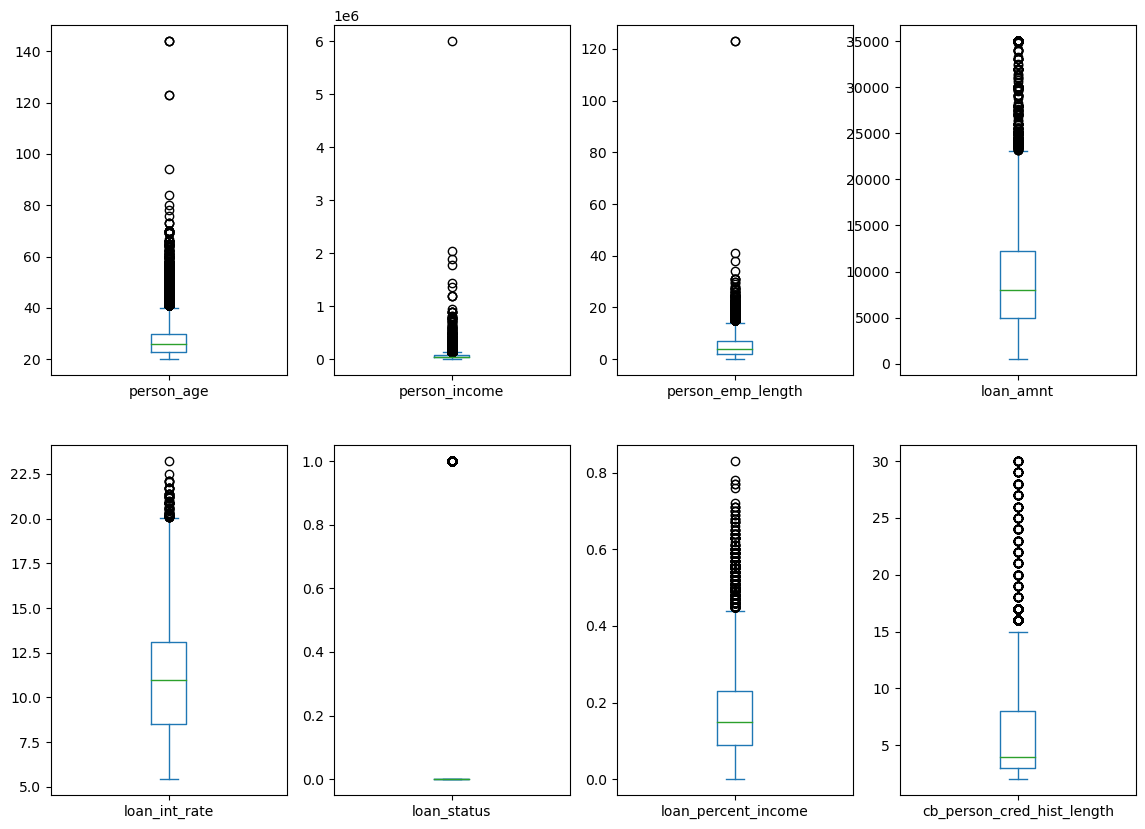

In [19]:
Num=df_int.plot(kind='box',subplots=True,layout=(2,4),figsize=(14,10))

#### Non_viz on person_home_ownership
* Mode

In [36]:
df['person_home_ownership'].mode()

0    RENT
Name: person_home_ownership, dtype: object

#### Viz on person_home_ownership

<AxesSubplot:>

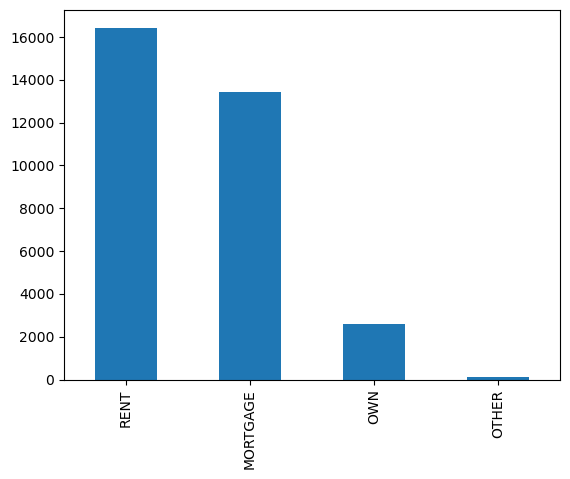

In [37]:
df['person_home_ownership'].value_counts().plot(kind='bar')

* Most of the people are from rent house to person_home_ownership


#### Non_viz on loan_intent
* Mode

In [38]:
df['loan_intent'].mode()

0    EDUCATION
Name: loan_intent, dtype: object

#### Viz on loan_intent

<AxesSubplot:>

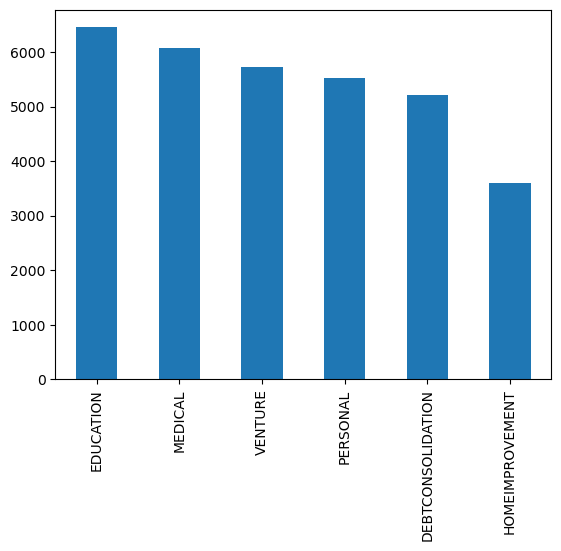

In [39]:
df['loan_intent'].value_counts().plot(kind='bar')

* In the loan_intent column most repeating is education
* The most of the people are taking loan on education

#### Non_viz on loan_grade
* Mode

In [40]:
df['loan_grade'].mode()

0    A
Name: loan_grade, dtype: object

#### Viz on loan_grade

<AxesSubplot:>

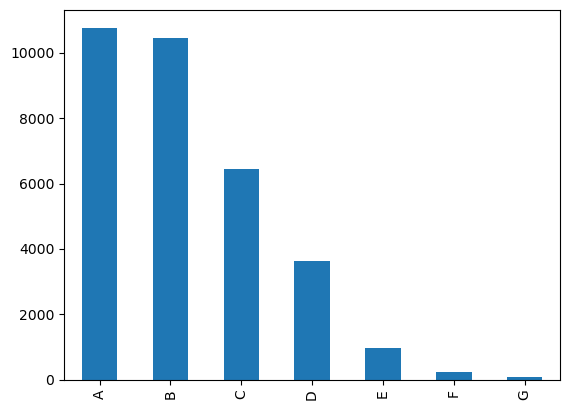

In [41]:
df['loan_grade'].value_counts().plot(kind='bar')

* In the grade column most reapeating grade is A
* The monthly payment more than 10000

#### Non_viz on cb_person_default_on_file
* Mode

In [42]:
df['cb_person_default_on_file'].mode()

0    N
Name: cb_person_default_on_file, dtype: object

#### Viz on cb_person_default_on_file

<AxesSubplot:>

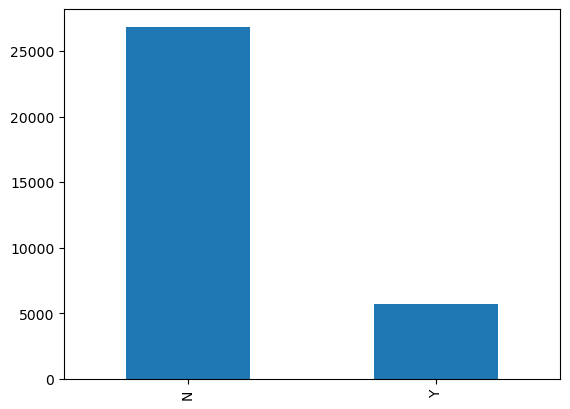

In [43]:
df['cb_person_default_on_file'].value_counts().plot(kind='bar')

* From the cb_person_default_on_file column most reapeating is N
* The majority of people who has loan more than 25000 has defalt oh file 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Non_viz on age
* Min,Max,Mean,median,std

In [18]:
print(df['person_age'].min())
print(df['person_age'].max())
print(df['person_age'].mean())
print(df['person_age'].median())
print(df['person_age'].std())

20
144
27.73459992019889
26.0
6.3480784192252475


* The mean and median are near maybe there are few or no outliers in person_age

### Viz on Person_age

AxesSubplot(0.125,0.11;0.775x0.77)


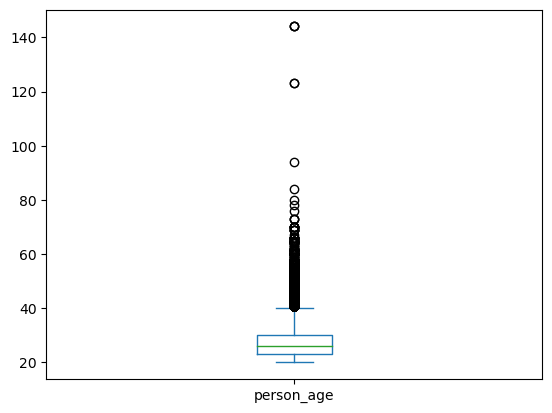

In [17]:
print(df['person_age'].plot(kind='box'))

* THe above boxplot shows that there are outliers in the person_age column

<AxesSubplot:ylabel='Density'>

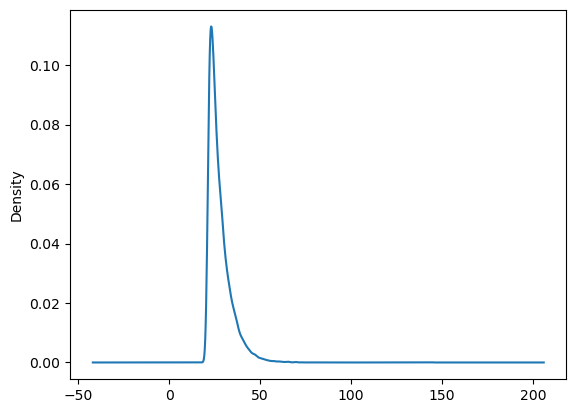

In [19]:
df['person_age'].plot(kind='kde')

* The kde plot shows there are outliers in right side of mean

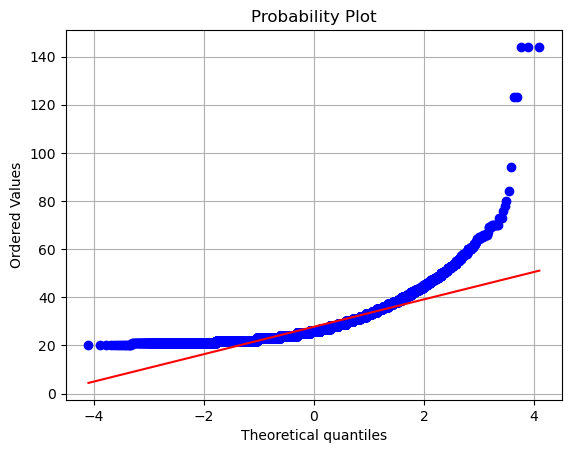

In [21]:
stats.probplot(df['person_age'],dist='norm',plot=plt)
plt.grid()

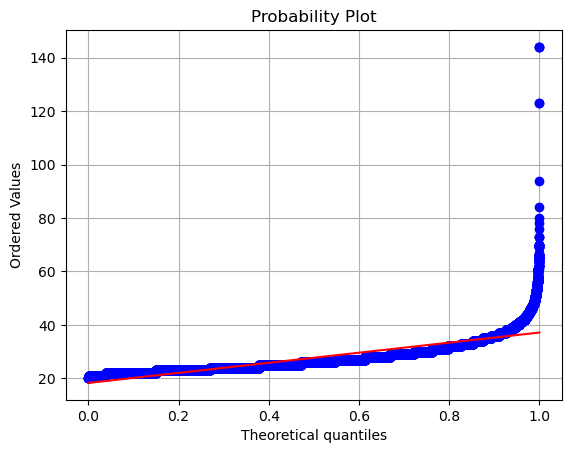

In [22]:
stats.probplot(df['person_age'],dist='uniform',plot=plt)
plt.grid()

In [23]:
# Applying boxcox
x_y,l=stats.boxcox(df['person_age'])
print(l)

-2.413496453615275


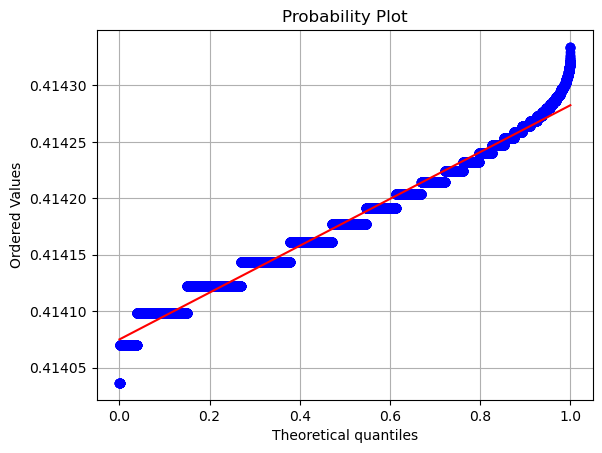

In [25]:
stats.probplot(x_y,dist='uniform',plot=plt)
plt.grid()

* The most number of data points are lying on the line
* It maybe the uniform distribution

### Non_viz on person_income
* min,max,mean,median,std

In [26]:
print(df['person_income'].min())
print(df['person_income'].max())
print(df['person_income'].mean())
print(df['person_income'].median())
print(df['person_income'].std())

4000
6000000
66074.84846996715
55000.0
61983.119168159064


* The mean and median are far maybe there are few or no outliers in person_income

### Viz on person_income

<AxesSubplot:>

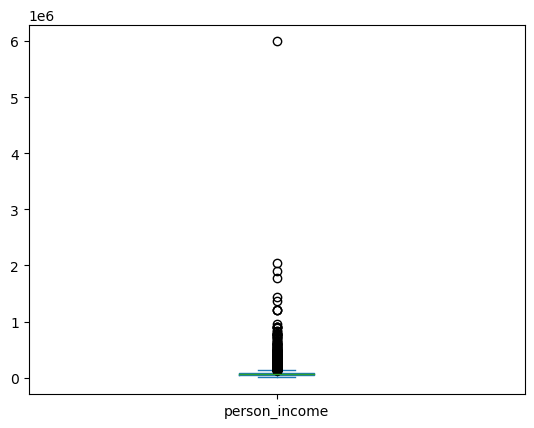

In [27]:
df['person_income'].plot(kind='box')

* There are few outliers in person_income column

<AxesSubplot:ylabel='Density'>

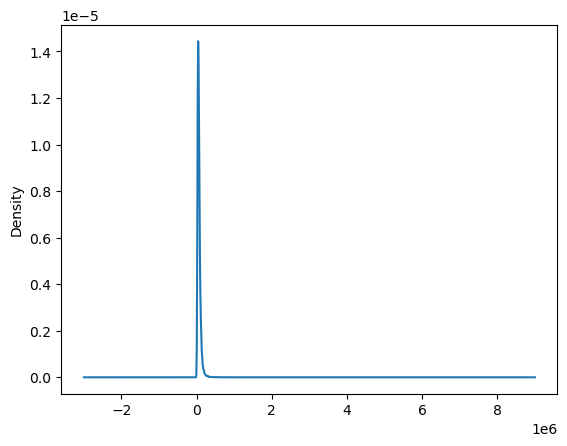

In [28]:
df['person_income'].plot(kind='kde')

* The kde plot is right skweed 
* The outliers are present in right side of plot

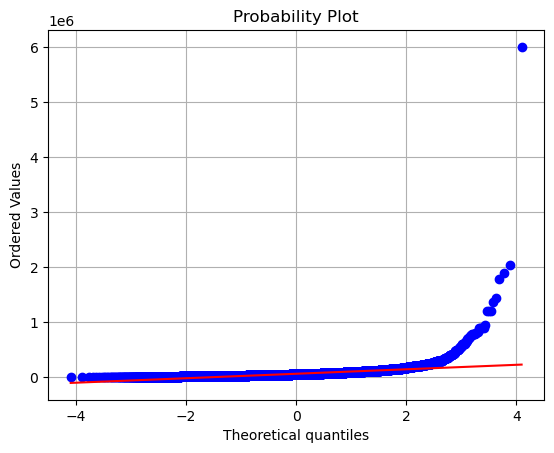

In [29]:
stats.probplot(df['person_income'],dist='norm',plot=plt)
plt.grid()

In [14]:
# Applying boxcox
x_v,l=stats.boxcox(df['person_income'])
print(l)

-0.06322518556191643


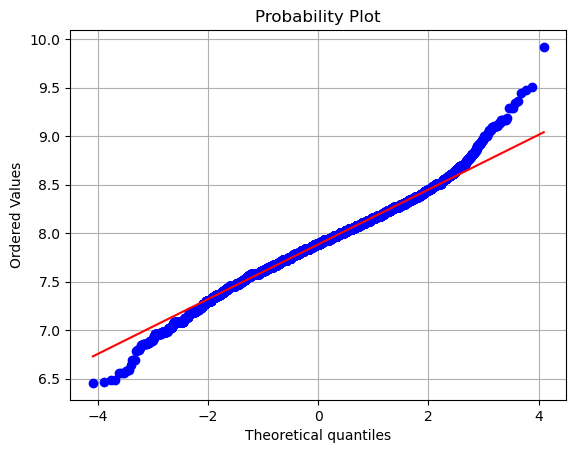

In [29]:
stats.probplot(x_v,dist='norm',plot=plt)
plt.grid()

* The max of data points are lied on the line 
* It maybe normal distribution

#### Non_viz on person_emp_length
* Min,max,mean,median,std

In [16]:
print(df['person_emp_length'].min())
print(df['person_emp_length'].max())
print(df['person_emp_length'].mean())
print(df['person_emp_length'].median())
print(df['person_emp_length'].std())

0.0
123.0
4.767993615911114
4.0
4.087371678206524


* The mean and median are near maybe there are few or now outliers

#### Viz on person_emp_length

<AxesSubplot:>

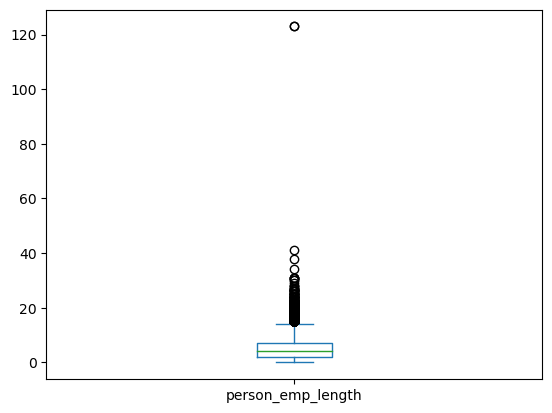

In [17]:
df['person_emp_length'].plot(kind='box')

* There are few outliers in this person_emp_length column

<AxesSubplot:ylabel='Density'>

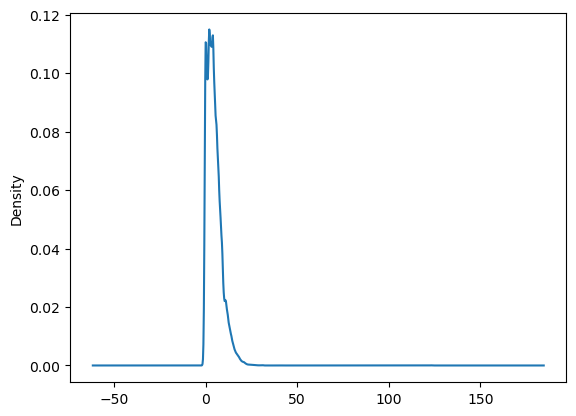

In [18]:
df['person_emp_length'].plot(kind='kde')

* The outliers are present in right side of the plot

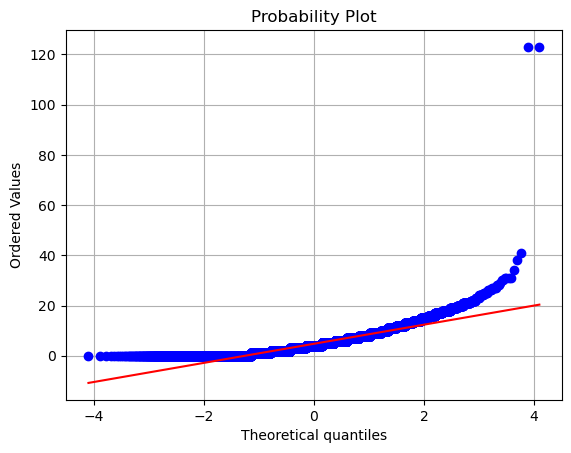

In [19]:
stats.probplot(df['person_emp_length'],dist='norm',plot=plt)
plt.grid()

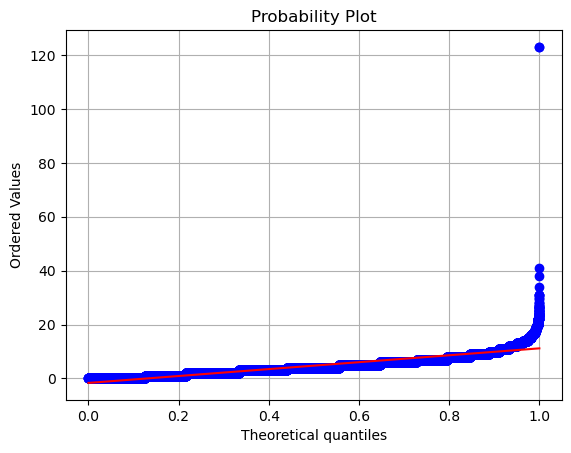

In [20]:
stats.probplot(df['person_emp_length'],dist='uniform',plot=plt)
plt.grid()

* The values are negitive

In [46]:
cln_data=df[df['person_emp_length']<=120.0]

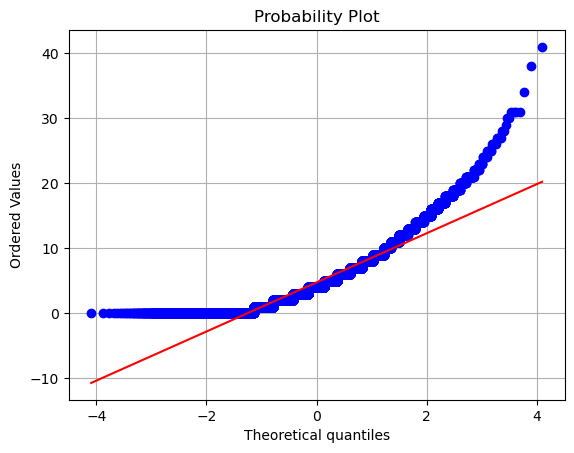

In [48]:
stats.probplot(cln_data['person_emp_length'],dist='norm',plot=plt)
plt.grid()

#### Non_viz on loan_amnt
* min,max,mean,median,std

In [24]:
print(df['loan_amnt'].min())
print(df['loan_amnt'].max())
print(df['loan_amnt'].mean())
print(df['loan_amnt'].median())
print(df['loan_amnt'].std())

500
35000
9589.371105859243
8000.0
6322.086645792174


* The mean and median are far maybe there are few are no outliers inthis loan_amnt column

#### Viz on loan_amnt

<AxesSubplot:>

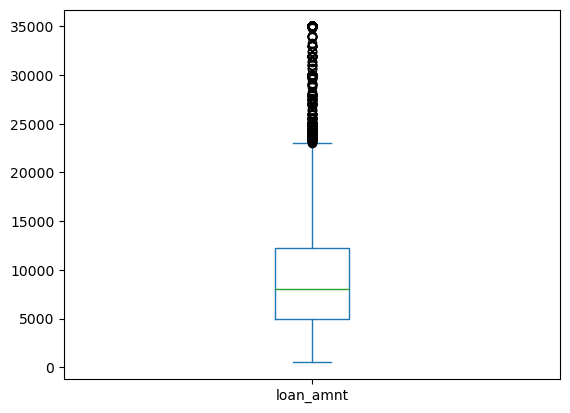

In [25]:
df['loan_amnt'].plot(kind='box')

* The are few outliers in this column

<AxesSubplot:ylabel='Density'>

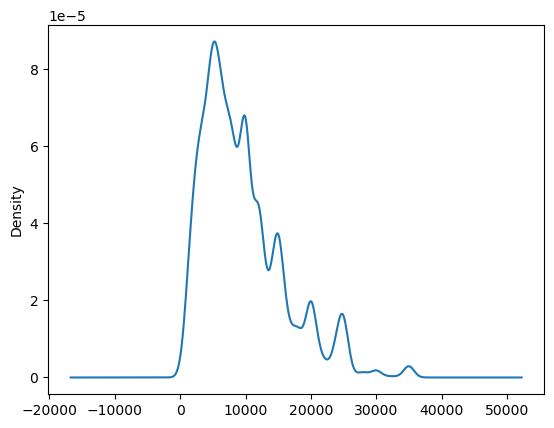

In [26]:
df['loan_amnt'].plot(kind='kde')

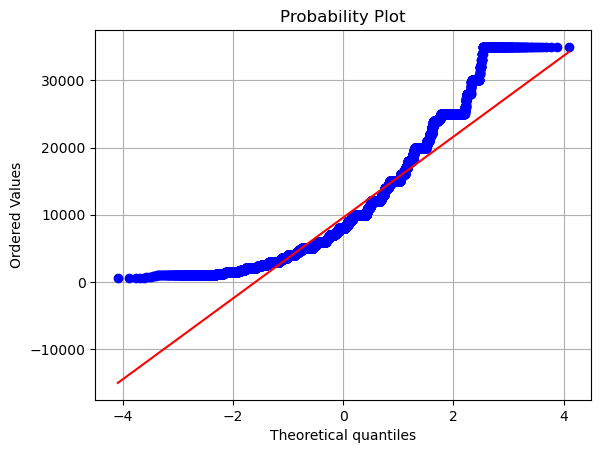

In [27]:
stats.probplot(df['loan_amnt'],dist='norm',plot=plt)
plt.grid()

In [29]:
# Applying boxcox
x_y,l=stats.boxcox(df['loan_amnt'])
print(l)

0.2363588392285395


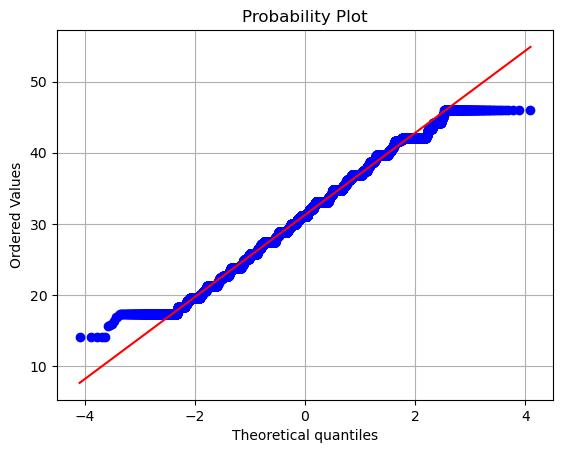

In [31]:
stats.probplot(x_y,dist='norm',plot=plt)
plt.grid()

* The most of the data points are lied on the line 
* It may be normal distribution

#### Non_viz on loan_int_rate
* min,max,mean,median,std

In [33]:
print(df['loan_int_rate'].min())
print(df['loan_int_rate'].max())
print(df['loan_int_rate'].mean())
print(df['loan_int_rate'].median())
print(df['loan_int_rate'].std())

5.42
23.22
11.009620023939183
10.99
3.0816111515930578


* The mean and median are different maybe there are few or no outliers in this loan_int_rate column

#### Viz on loan_int_rate

<AxesSubplot:>

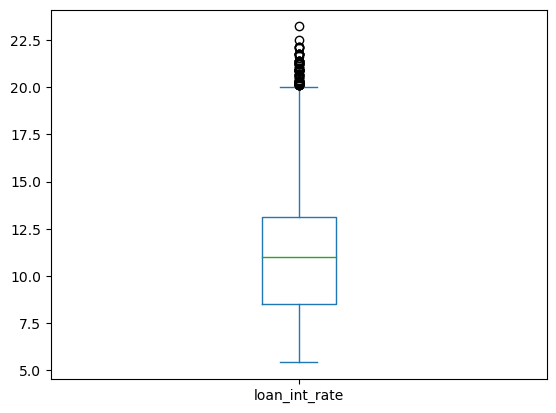

In [34]:
df['loan_int_rate'].plot( kind='box')

* There are few outliers in this column

<AxesSubplot:ylabel='Density'>

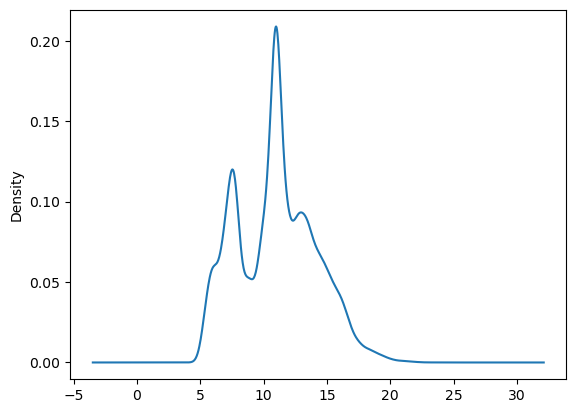

In [35]:
df['loan_int_rate'].plot(kind='kde')

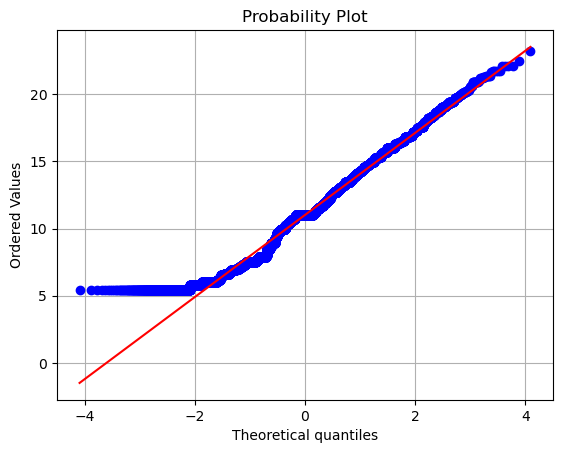

In [36]:
stats.probplot(df['loan_int_rate'],dist='norm',plot=plt)
plt.grid()

* The most of the data is lied on the line
* Maybe it is in normal distribution

#### Non_viz on loan_status
* min,max,mean,median,std

In [41]:
print(df['loan_status'].min())
print(df['loan_status'].max())
print(df['loan_status'].mean())
print(df['loan_status'].median())
print(df['loan_status'].std())

0
1
0.21816396059052823
0.0
0.4130056685601785


* The mean and median are near maybe there are few or no outliers in this column

#### Viz on loan_status

<AxesSubplot:>

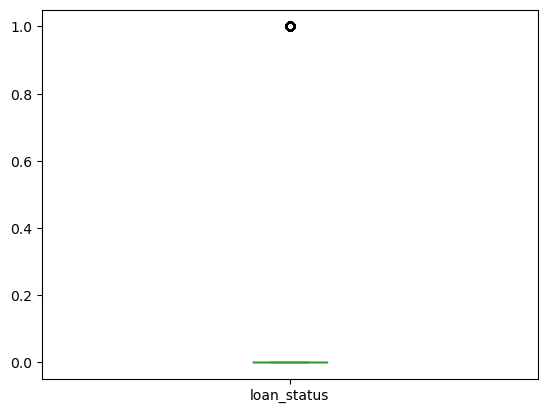

In [42]:
df['loan_status'].plot(kind='box')

* There are few outliere in this column which far away from the mean

<AxesSubplot:ylabel='Density'>

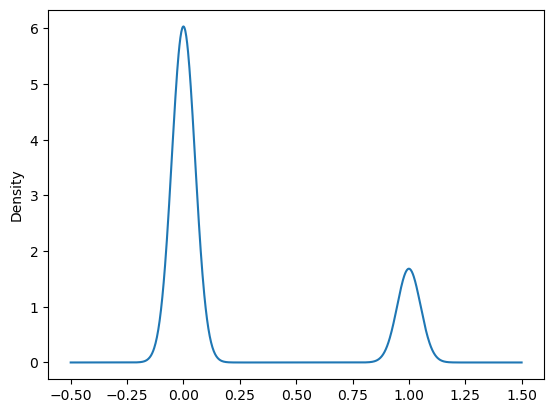

In [43]:
df['loan_status'].plot(kind='kde')

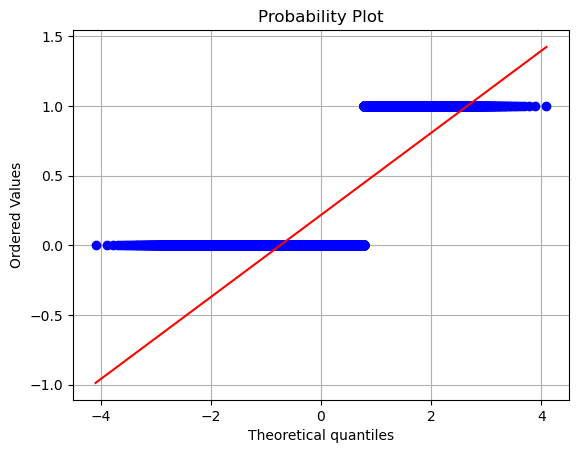

In [44]:
stats.probplot(df['loan_status'],dist='norm',plot=plt)
plt.grid()

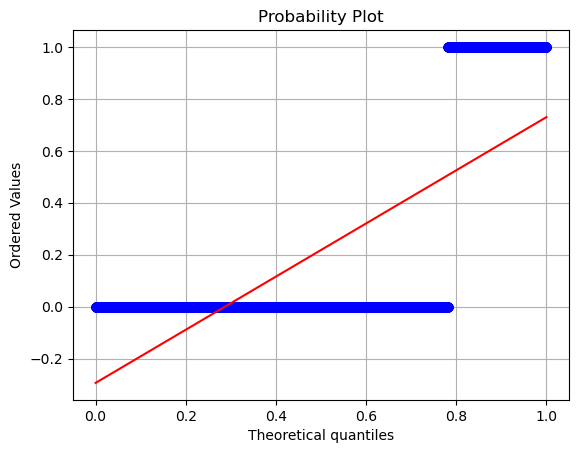

In [47]:
stats.probplot(df['loan_status'],dist='uniform',plot=plt)
plt.grid()

* The above column has -ve values

In [23]:
cln_data=df[df['loan_status']<1]

<AxesSubplot:>

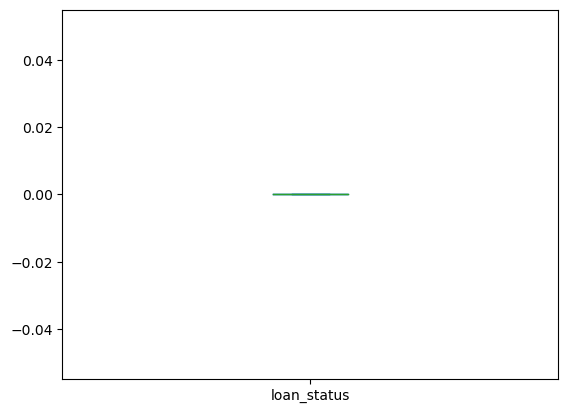

In [24]:
cln_data['loan_status'].plot(kind='box')

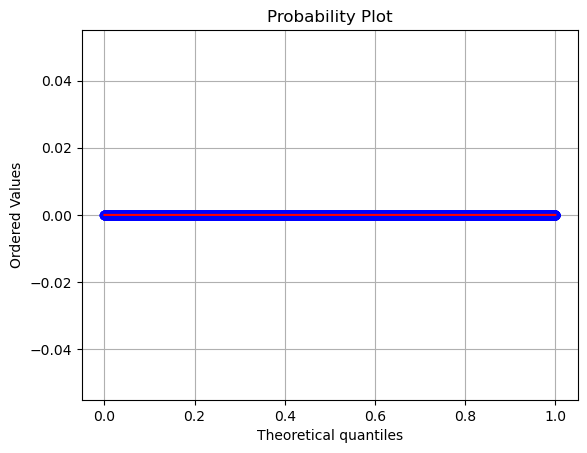

In [25]:
stats.probplot(cln_data['loan_status'],dist='uniform',plot=plt)
plt.grid()

#### Non_viz on loan_percent_income
* min,max,mean,median,std

In [48]:
print(df['loan_percent_income'].min())
print(df['loan_percent_income'].max())
print(df['loan_percent_income'].mean())
print(df['loan_percent_income'].median())
print(df['loan_percent_income'].std())

0.0
0.83
0.17020349283325145
0.15
0.10678175634492885


* THe mean and median are near maybe there are few or no outliers

#### Viz on loan_percent_income

<AxesSubplot:>

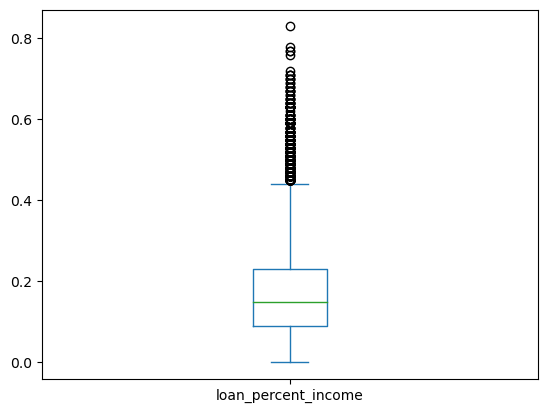

In [49]:
df['loan_percent_income'].plot(kind='box')

* There are few outliers in this column

<AxesSubplot:ylabel='Density'>

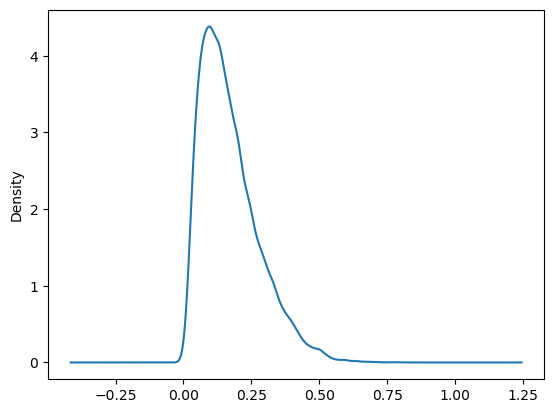

In [50]:
df['loan_percent_income'].plot(kind='kde')

* The plot look like bell shape but right skew

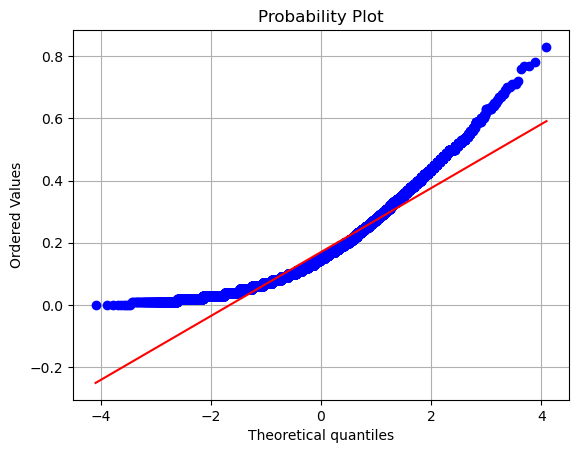

In [51]:
stats.probplot(df['loan_percent_income'],dist='norm',plot=plt)
plt.grid()

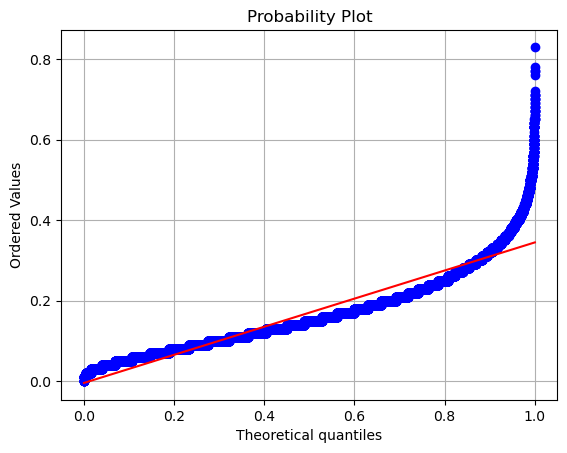

In [52]:
stats.probplot(df['loan_percent_income'],dist='uniform',plot=plt)
plt.grid()

* The above column has -ve values

In [26]:
# Removing outliers with condition
cln_data=df[df['loan_percent_income']<0.45]

<AxesSubplot:>

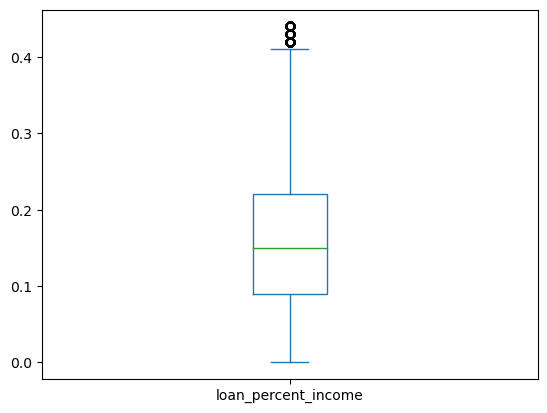

In [27]:
cln_data['loan_percent_income'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

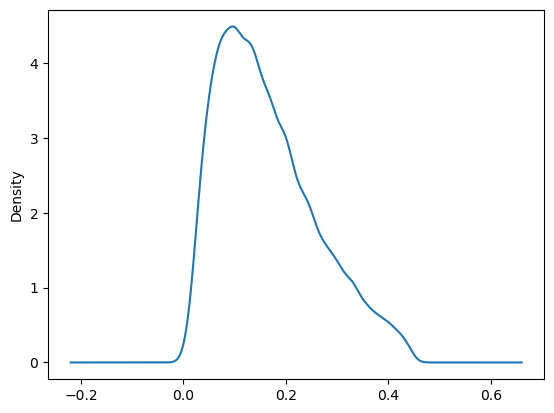

In [28]:
cln_data['loan_percent_income'].plot(kind='kde')

* The above plot look like bellshape

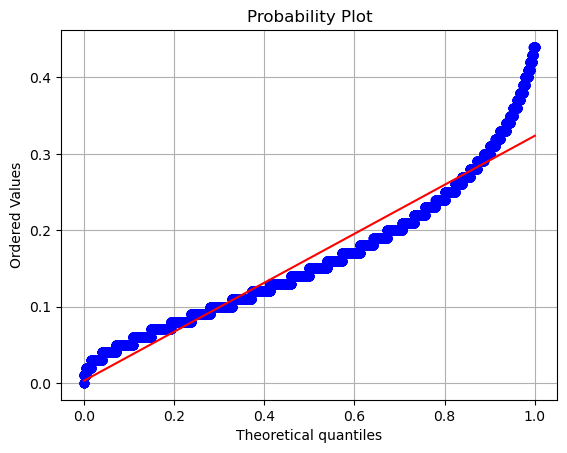

In [30]:
stats.probplot(cln_data['loan_percent_income'],dist='uniform',plot=plt)
plt.grid()

* The most of the data points are lied on the line
* It may be a uniform distribution

#### Non_viz on cb_person_cred_hist_length
* min,max,mean,median,std

In [54]:
print(df['cb_person_cred_hist_length'].min())
print(df['cb_person_cred_hist_length'].max())
print(df['cb_person_cred_hist_length'].mean())
print(df['cb_person_cred_hist_length'].median())
print(df['cb_person_cred_hist_length'].std())

2
30
5.804211043246064
4.0
4.0550011647128406


* The mean and median are not same maybe there are few or no outliers

#### viz on cb_person_cred_hist_length

<AxesSubplot:>

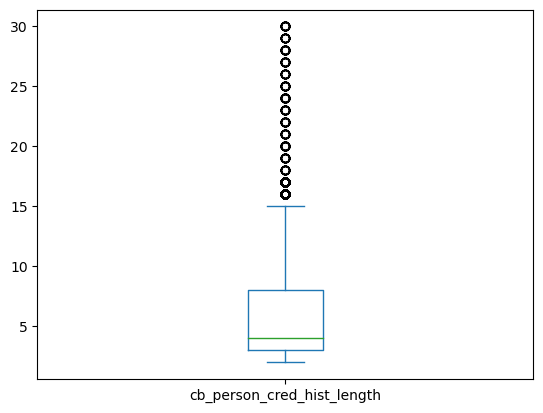

In [55]:
df['cb_person_cred_hist_length'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

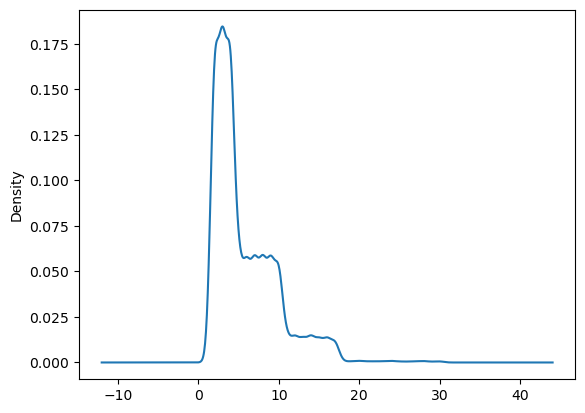

In [56]:
df['cb_person_cred_hist_length'].plot(kind='kde')

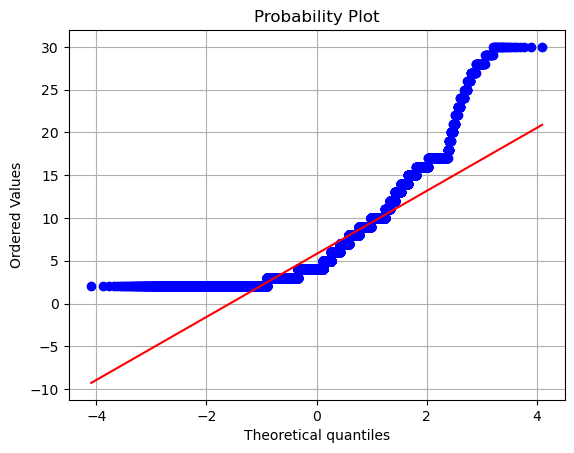

In [57]:
stats.probplot(df['cb_person_cred_hist_length'],dist='norm',plot=plt)
plt.grid()

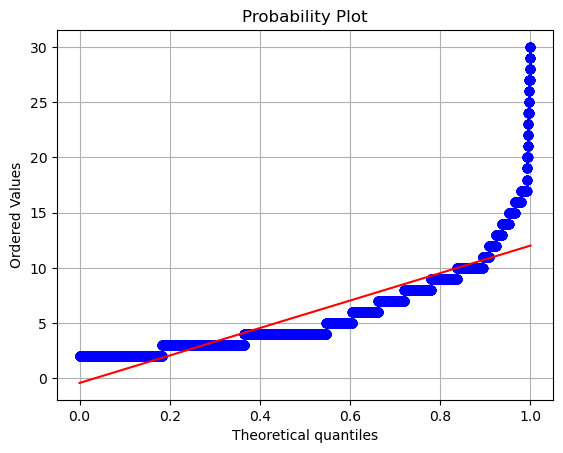

In [58]:
stats.probplot(df['cb_person_cred_hist_length'],dist='uniform',plot=plt)
plt.grid()

# Bivariate Analysis

### Num Vs NUM

#### Between person_age and loan_status

<AxesSubplot:xlabel='person_age', ylabel='loan_status'>

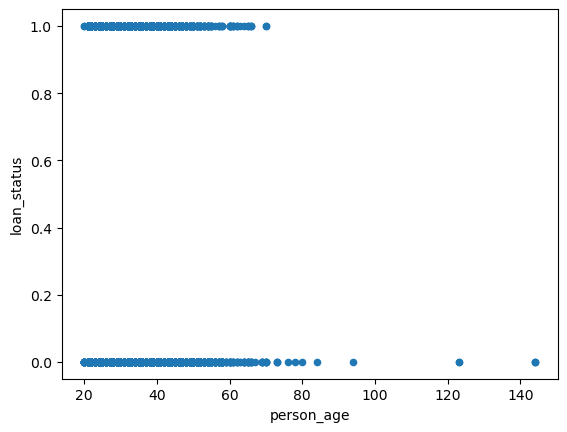

In [12]:
df.plot(x='person_age',y='loan_status',kind='scatter')

* There is no relation between loan_status and person_age

#### Between person_income and loan_status

<AxesSubplot:xlabel='person_income', ylabel='loan_status'>

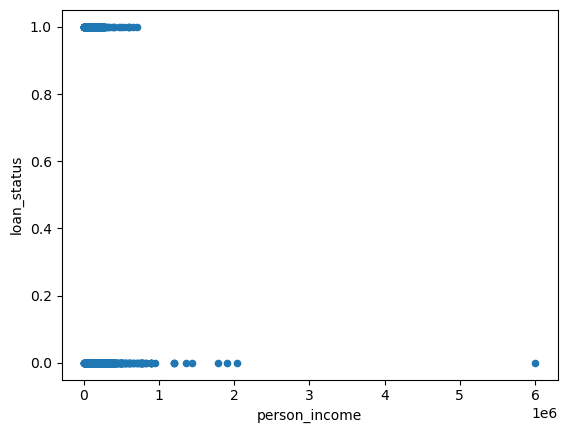

In [14]:
df.plot(x='person_income',y='loan_status',kind='scatter')

* There is no relation between loan_status and person_income

#### Between person_emp_length and loan_status

<AxesSubplot:xlabel='person_emp_length', ylabel='loan_status'>

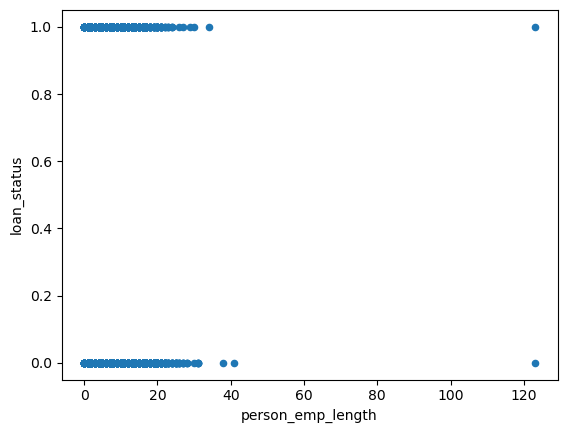

In [15]:
df.plot(x='person_emp_length',y='loan_status',kind='scatter')

* There is no relation between person_emp_length and loan_status

#### Between loan_amnt and loan_status

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

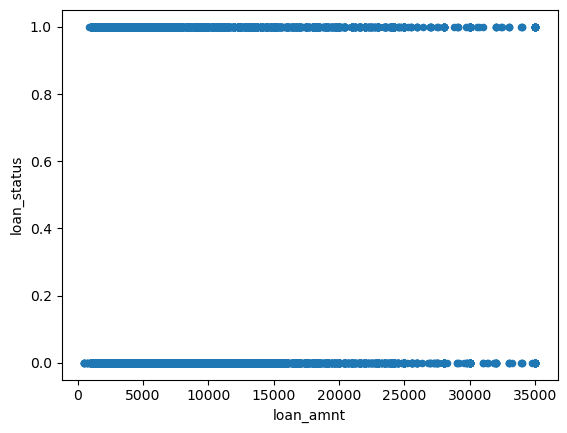

In [16]:
df.plot(x='loan_amnt',y='loan_status',kind='scatter')

* There is no relation betweem loan_amnt and loan_status

#### Between loan_int_rate and loan_status

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_status'>

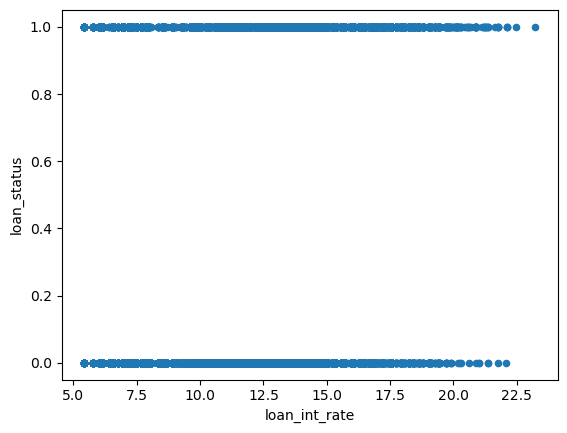

In [17]:
df.plot(x='loan_int_rate',y='loan_status',kind='scatter')

* there is no relation between loan_int_rate and loan_status

#### Between loan_percent_income and loan_status

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_status'>

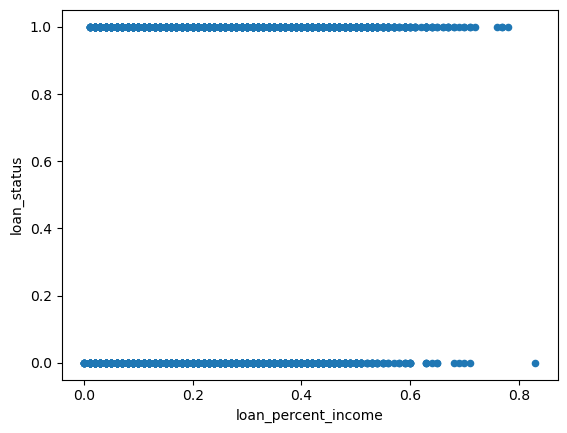

In [18]:
df.plot(x='loan_percent_income',y='loan_status',kind='scatter')

* There is no relation between loan_percent_income and loan_status

#### Between cb_person_cred_hist_length and loan_status

<AxesSubplot:xlabel='cb_person_cred_hist_length', ylabel='loan_status'>

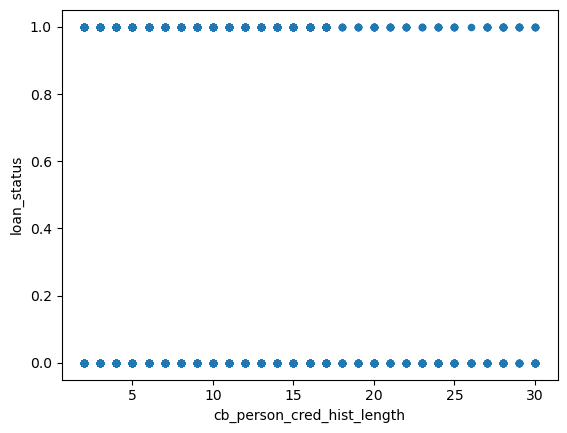

In [19]:
df.plot(x='cb_person_cred_hist_length',y='loan_status',kind='scatter')

* There is no relation between both the columns

### NUm vs Cato

#### Between person_home_ownership and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='person_home_ownership'>

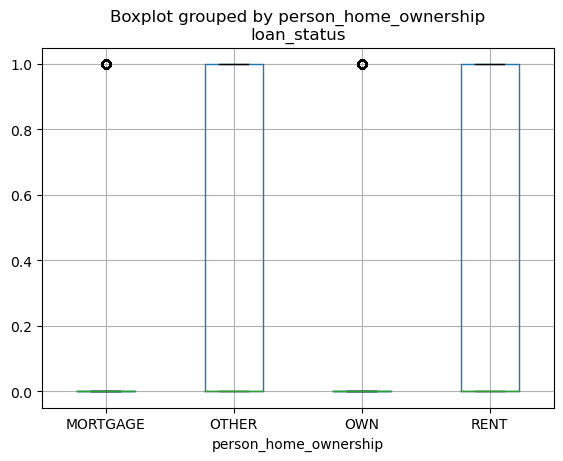

In [21]:
df.boxplot(by='person_home_ownership',column='loan_status')

* The means of mortgage,others,own,rent are same
* The rent and other of person_home_ownership are more than mortgage and own persons
* The rent and other people are applying more than others

#### Between loan_intent and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='loan_intent'>

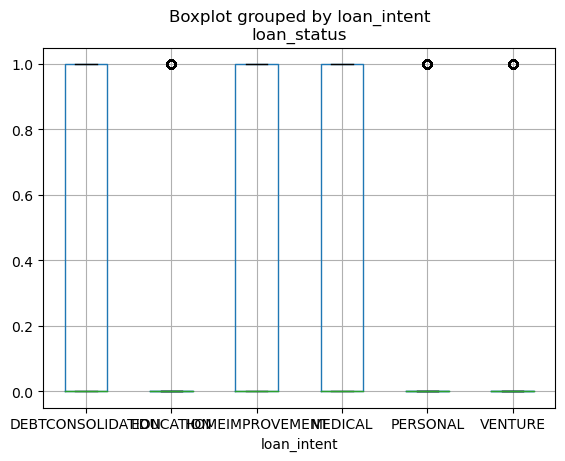

In [22]:
df.boxplot(by='loan_intent',column='loan_status')

* The mean of loan_intent is same
* THe most of the people applying loan on Debtconsolidation,Homeimprovement,Medical

#### Between loan_grade and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='loan_grade'>

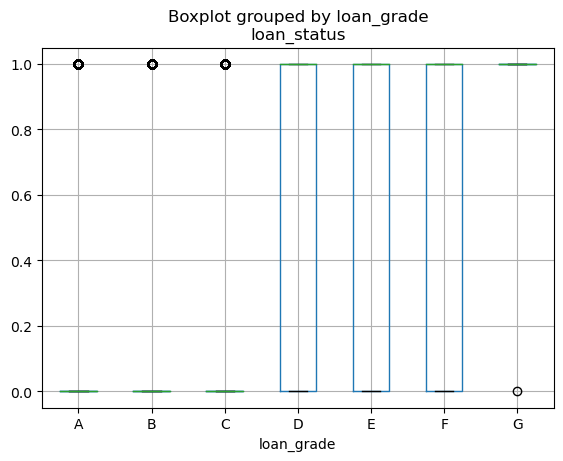

In [25]:
df.boxplot(by='loan_grade',column='loan_status')

* The majority of the people are in the grade of D,E,F 
* So the people are not paying loans in given time

#### Between cb_person_default_on_file and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='cb_person_default_on_file'>

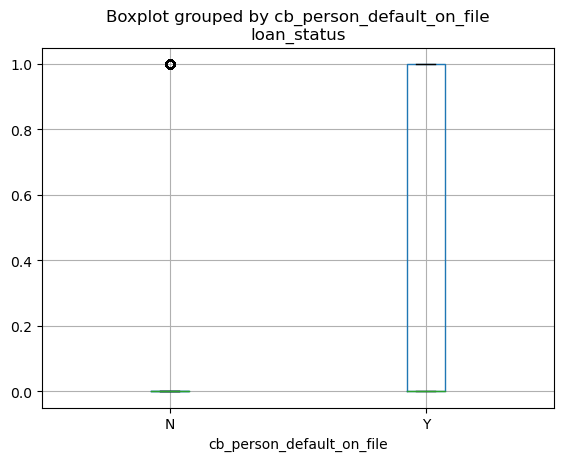

In [26]:
df.boxplot(by='cb_person_default_on_file',column='loan_status')

* The above boxplot shows that the most of the people has default on file

# Conclusion:

* The rent and other people are applying more loan application  than others
* THe most of the people applying loan on Debtconsolidation,Homeimprovement,Medical

* The majority of the people are in the grade of D,E,F 
* So the people are not paying loans in given time
* The majority of the people has the defalt on files

# Recommendations:

* Check the previous status if the person is good in paying the loan in time approve it.
* The income less than the payment reject that person application
* Check the creadit score to estimate the loan amount 

In [29]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [18]:
def outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lb=Q1-(1.5*IQR)
    Ub=Q3+(1.5*IQR)
    df=df[(df[col]>Lb)&(df[col]<Ub)]
    return df

In [19]:
df=outliers(df,'person_age')
df.shape

(30925, 12)

In [20]:
df=outliers(df,'person_income')
df.shape

(29457, 12)

In [21]:
df=outliers(df,'person_emp_length')
df.shape

(28844, 12)

In [22]:
df=outliers(df,'loan_amnt')
df.shape

(27614, 12)

In [23]:
df=outliers(df,'loan_int_rate')
df.shape

(27582, 12)

In [24]:
df=outliers(df,'loan_percent_income')
df.shape

(26860, 12)

In [25]:
df=outliers(df,'cb_person_cred_hist_length')
df.shape

(25786, 12)

In [26]:
df.shape

(25786, 12)

In [25]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [27]:
import seaborn as sns

In [28]:
# step-1
y=df['loan_status']
X=df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]

In [29]:
# step-2.1
# spliting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
# step-2.2   [spliting data into X_train num]
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
6970,22,105500,6.0,6000,11.99,0.06,4
23863,30,66500,5.0,8000,7.88,0.12,9
5499,22,61000,2.0,5000,7.66,0.08,3
21389,29,48000,3.0,17375,14.27,0.36,5
28607,34,30000,4.0,4300,7.90,0.14,9


In [31]:
# step-2.3   [spliting data into X_train_categorical]
X_train_obj=X_train.select_dtypes(include=['object'])
X_train_obj.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
6970,RENT,EDUCATION,B,N
23863,MORTGAGE,DEBTCONSOLIDATION,A,N
5499,RENT,VENTURE,A,N
21389,MORTGAGE,PERSONAL,C,Y
28607,MORTGAGE,PERSONAL,A,N


In [32]:
# step-2.4   [spliting X_train_cate_normal]
X_train_obj_normal=X_train_obj[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_train_obj_normal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
6970,RENT,EDUCATION,N
23863,MORTGAGE,DEBTCONSOLIDATION,N
5499,RENT,VENTURE,N
21389,MORTGAGE,PERSONAL,Y
28607,MORTGAGE,PERSONAL,N


In [33]:
# step-2.5   [spliting X_train_cate_ordinal]
X_train_obj_order=X_train_obj[['loan_grade']]
X_train_obj_order.head()

,loan_grade
6970,B
23863,A
5499,A
21389,C
28607,A


In [34]:
# step-2.6    [spliting data into X_test_num]
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
7624,21,54000,5.0,20000,10.74,0.37,2
18404,27,21403,2.0,2100,11.12,0.10,7
5215,22,110500,2.0,9000,5.79,0.08,4
15417,20,135000,1.0,15000,15.96,0.11,2
22953,29,60000,1.0,5600,12.42,0.09,10


In [35]:
# step-2.7    [spliting data into X_test_cate]
X_test_obj=X_test.select_dtypes(include=['object'])
X_test_obj.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
7624,OWN,VENTURE,B,N
18404,MORTGAGE,HOMEIMPROVEMENT,B,N
5215,RENT,EDUCATION,A,N
15417,MORTGAGE,VENTURE,C,Y
22953,MORTGAGE,PERSONAL,B,N


In [36]:
# step-2.8    [spliting test data into X_test_cate_ohe]
X_test_obj_normal=X_test_obj[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_test_obj_normal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
7624,OWN,VENTURE,N
18404,MORTGAGE,HOMEIMPROVEMENT,N
5215,RENT,EDUCATION,N
15417,MORTGAGE,VENTURE,Y
22953,MORTGAGE,PERSONAL,N


In [37]:
# step-2.9    [spliting test data into X_test_cate_le]
X_test_obj_order=X_test_obj[['loan_grade']]
X_test_obj_order.head()

,loan_grade
7624,B
18404,B
5215,A
15417,C
22953,B


In [38]:
# step-3.1
# Data preprocessing on num columns using 'Standardscaler'
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_rescaler=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_train_num_rescaler.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
6970,-1.060714,1.829019,0.502149,-0.485928,0.353363,-1.114353,-0.289929
23863,1.019648,0.343915,0.199859,-0.070016,-1.005694,-0.447163,1.621222
5499,-1.060714,0.134477,-0.707011,-0.693885,-1.078441,-0.891956,-0.672159
21389,0.759603,-0.360558,-0.404721,1.879576,1.107293,2.221599,0.092301
28607,2.059829,-1.045990,-0.102431,-0.839454,-0.999080,-0.224766,1.621222


In [39]:
# step-3.2   [applying ohe ]
from sklearn.preprocessing import OneHotEncoder
coder=OneHotEncoder(drop='first',sparse=False)
X_train_obj_normal_ohe=pd.DataFrame(coder.fit_transform(X_train_obj_normal),columns=coder.get_feature_names_out(X_train_obj_normal.columns),index=X_train_obj_normal.index)
                                    
X_train_obj_normal_ohe.head()                                

C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
6970,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
23863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21389,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
28607,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# step-3.3   [applying le ]
X_train_obj_order_le=pd.DataFrame(index=X_train_obj_order.index)
X_train_obj_order_le.head()

""
6970
23863
5499
21389
28607


In [41]:
# step-3.4  
lg={'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}
X_train_obj_order_le['loan_grade']=X_train_obj_order['loan_grade'].apply(lambda x:lg[x])
X_train_obj_order_le.head()

,loan_grade
6970,6
23863,7
5499,7
21389,5
28607,7


In [42]:
# step-3.5   [transforming train data]
X_train_transform=pd.concat([X_train_num_rescaler,X_train_obj_normal_ohe,X_train_obj_order_le],axis=1)
X_train_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
6970,-1.060714,1.829019,0.502149,-0.485928,0.353363,-1.114353,-0.289929,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6
23863,1.019648,0.343915,0.199859,-0.070016,-1.005694,-0.447163,1.621222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5499,-1.060714,0.134477,-0.707011,-0.693885,-1.078441,-0.891956,-0.672159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
21389,0.759603,-0.360558,-0.404721,1.879576,1.107293,2.221599,0.092301,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
28607,2.059829,-1.045990,-0.102431,-0.839454,-0.999080,-0.224766,1.621222,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


In [43]:
# step-4 [bulding model]
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train_transform,y_train)

LogisticRegression()

In [44]:
# step-5.1   [data preprocessing on test data numeric columns]
X_test_num_rescaler=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)
X_test_num_rescaler.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
7624,-1.320759,-0.132080,0.199859,2.425462,-0.059975,2.332797,-1.054389
18404,0.239512,-1.373361,-0.707011,-1.296959,0.065680,-0.669559,0.856762
5215,-1.060714,2.019417,-0.707011,0.137941,-1.696796,-0.891956,-0.289929
15417,-1.580804,2.952366,-1.009301,1.385680,1.666126,-0.558361,-1.054389
22953,0.759603,0.096397,-1.009301,-0.569111,0.495552,-0.780758,2.003452


In [45]:
# step-5.2    [preprocesing on test normal]
X_test_obj_normal_one=pd.DataFrame(coder.transform(X_test_obj_normal),columns=coder.get_feature_names_out(X_test_obj_normal.columns),index=X_test_obj_normal.index)
X_test_obj_normal_one.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
7624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5215,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
22953,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
# step-5.3 [preproceing on test order]
X_test_obj_order_le=pd.DataFrame(index=X_test_obj_order.index)
X_test_obj_order_le.head()

""
7624
18404
5215
15417
22953


In [47]:
# step-5.4
X_test_obj_order_le['loan_grade']=X_test_obj_order['loan_grade'].apply(lambda x:lg[x])
X_test_obj_order_le.head()

,loan_grade
7624,6
18404,6
5215,7
15417,5
22953,6


In [48]:
# step-5.5 [X_test_transform by concating]
X_test_transform=pd.concat([X_test_num_rescaler,X_test_obj_normal_one,X_test_obj_order_le],axis=1)
X_test_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
7624,-1.320759,-0.132080,0.199859,2.425462,-0.059975,2.332797,-1.054389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
18404,0.239512,-1.373361,-0.707011,-1.296959,0.065680,-0.669559,0.856762,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
5215,-1.060714,2.019417,-0.707011,0.137941,-1.696796,-0.891956,-0.289929,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
15417,-1.580804,2.952366,-1.009301,1.385680,1.666126,-0.558361,-1.054389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5
22953,0.759603,0.096397,-1.009301,-0.569111,0.495552,-0.780758,2.003452,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6


In [49]:
# step-6  [prediction]
y_test_predict=reg.predict(X_test_transform)

In [50]:
# syep-7  [evaluation]
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
print('accu_score:',metrics.accuracy_score(y_test,y_test_predict))
print('class_report:',metrics.classification_report(y_test,y_test_predict))

accu_score: 0.851403753683884
class_report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5118
           1       0.72      0.46      0.56      1329

    accuracy                           0.85      6447
   macro avg       0.80      0.71      0.73      6447
weighted avg       0.84      0.85      0.84      6447



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

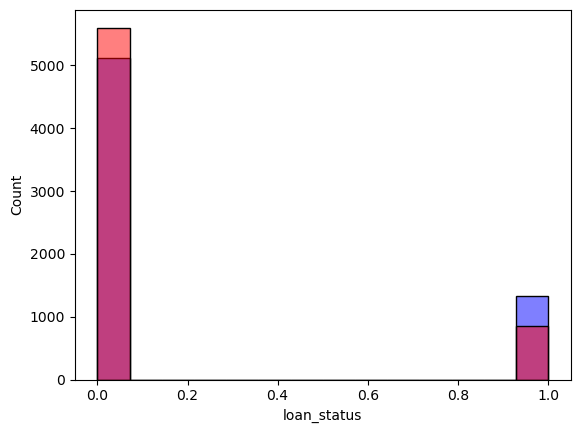

In [51]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)

# DT

In [181]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
reg.fit(X_train_transform,y_train)

y_test_predict=reg.predict(X_test_transform)

from sklearn import metrics
print('accu_score :',metrics.accuracy_score(y_test,y_test_predict))
print('class_report :',metrics.classification_report(y_test,y_test_predict))

accu_score : 0.8821517412935324
class_report :               precision    recall  f1-score   support

           0       0.94      0.92      0.93      5142
           1       0.69      0.75      0.72      1290

    accuracy                           0.88      6432
   macro avg       0.81      0.83      0.82      6432
weighted avg       0.89      0.88      0.88      6432



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

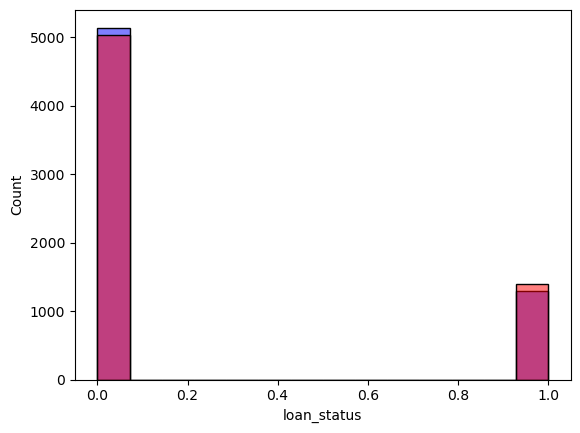

In [182]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
reg=KNeighborsClassifier()
reg.fit(X_train_transform,y_train)

y_test_predict=reg.predict(X_test_transform)

from sklearn import metrics
print('accu_score :',metrics.accuracy_score(y_test,y_test_predict))
print('class_report :',metrics.classification_report(y_test,y_test_predict))

accu_score : 0.8866139289592059
class_report :               precision    recall  f1-score   support

           0       0.90      0.97      0.93      5118
           1       0.83      0.57      0.67      1329

    accuracy                           0.89      6447
   macro avg       0.86      0.77      0.80      6447
weighted avg       0.88      0.89      0.88      6447



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

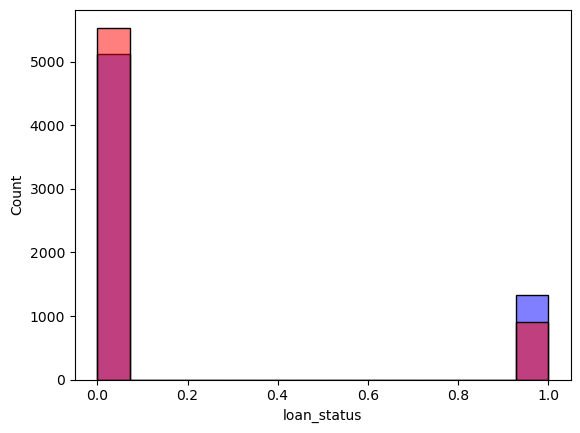

In [60]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)

# Naive bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
clas=GaussianNB()
clas.fit(X_train_transform,y_train)

y_test_predict=clas.predict(X_test_transform)

metrics.accuracy_score(y_test,y_test_predict)

0.8185202419730107

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

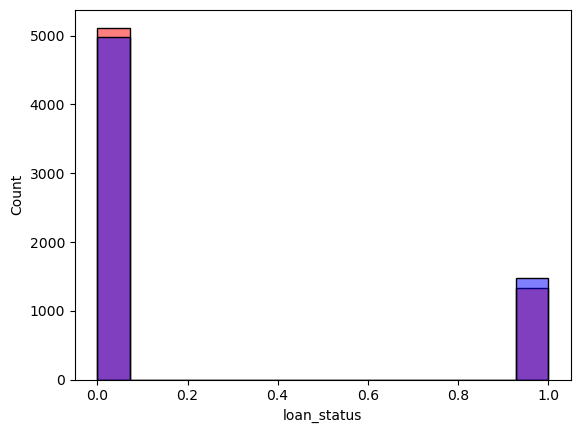

In [62]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_test_predict,color='blue',alpha=0.5)

# support vector

In [64]:
from sklearn.svm import SVC
clas=SVC()
clas.fit(X_train_transform,y_train)

y_test_predict=clas.predict(X_test_transform)

metrics.accuracy_score(y_test,y_test_predict)

0.8883201489064682

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

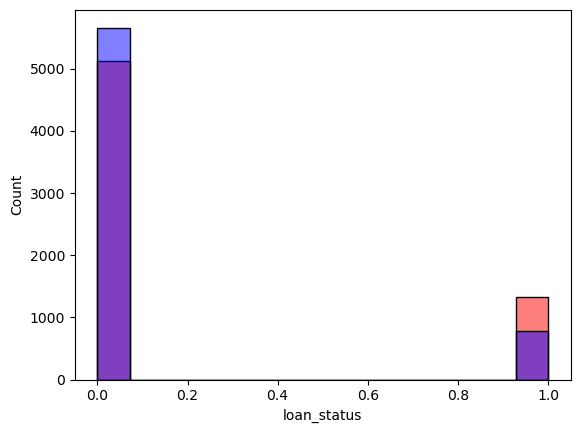

In [65]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_test_predict,color='blue',alpha=0.5)

# Ensemble

# RF

In [66]:
from sklearn.ensemble import RandomForestClassifier
reg=RandomForestClassifier()
reg.fit(X_train_transform,y_train)

y_test_predict=reg.predict(X_test_transform)

from sklearn import metrics
print('accu_score :',metrics.accuracy_score(y_test,y_test_predict))
print('class_report :',metrics.classification_report(y_test,y_test_predict))

accu_score : 0.9309756475880254
class_report :               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5118
           1       0.97      0.69      0.80      1329

    accuracy                           0.93      6447
   macro avg       0.95      0.84      0.88      6447
weighted avg       0.93      0.93      0.93      6447



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

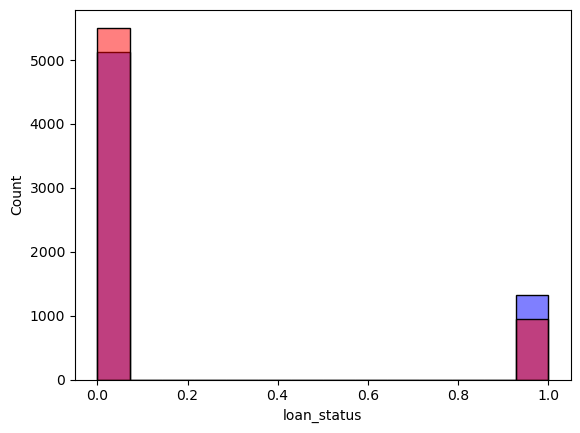

In [67]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)

# Gdaboos

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
clas=GradientBoostingClassifier()
clas.fit(X_train_transform,y_train)

y_test_predict=clas.predict(X_test_transform)

metrics.accuracy_score(y_test,y_test_predict)

0.9227547696603071

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

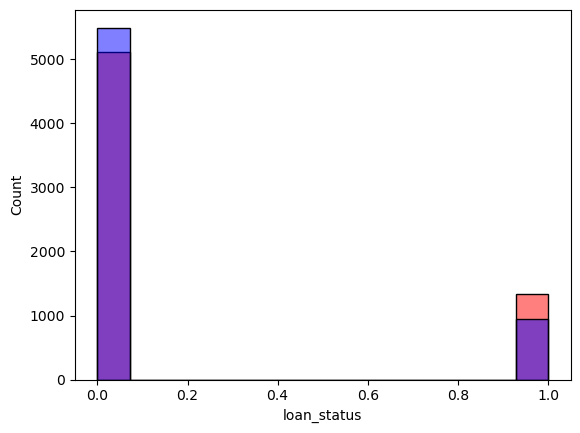

In [69]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_test_predict,color='blue',alpha=0.5)

# Adaboos

In [70]:
from sklearn.ensemble import AdaBoostClassifier
clas=AdaBoostClassifier()
clas.fit(X_train_transform,y_train)

y_test_predict=clas.predict(X_test_transform)
metrics.accuracy_score(y_test_predict,y_test_predict)

1.0

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

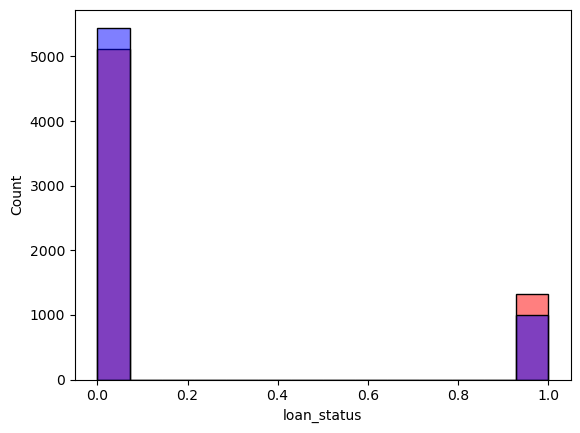

In [71]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_test_predict,color='blue',alpha=0.5)

# Extra tree

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
clas=ExtraTreesClassifier()
clas.fit(X_train_transform,y_train)

y_test_predict=clas.predict(X_test_transform)
metrics.accuracy_score(y_test_predict,y_test_predict)

1.0

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

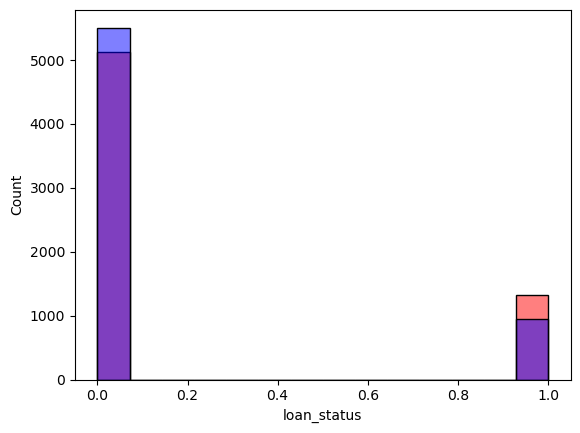

In [78]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_test_predict,color='blue',alpha=0.5)

# Bagging

In [74]:
from sklearn.ensemble import BaggingClassifier
clas=BaggingClassifier()
clas.fit(X_train_transform,y_train)

y_test_predict=clas.predict(X_test_transform)
metrics.accuracy_score(y_test_predict,y_test_predict)

1.0

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

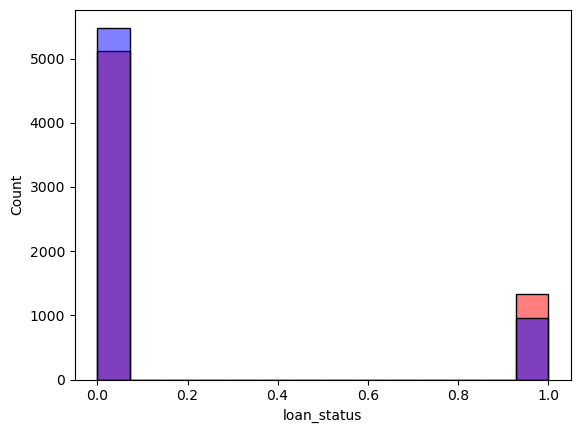

In [75]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_test_predict,color='blue',alpha=0.5)

# KNN maths

In [49]:
x_train=X_train_transform.to_numpy()
x_test=X_test_transform.to_numpy()
np_y_train=y_train.to_numpy()

def algo(x_train,np_y_train,k,xq):
    distance=np.sqrt(np.sum((x_train-xq)**2,axis=1))
    sorted_distance=np.argsort(distance)[:k]
    return np.mean(np_y_train[sorted_distance])
k=5
xq=x_test
y_test_predict=[]

for i in range(len(xq)):
    predict=algo(x_train,np_y_train,k,xq[i])       
    y_test_predict.append(predict)               # step-6

In [50]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_predict)

0.1692259965875601

# DT using maths

In [88]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train_transform,y_train)

y_test_predict=classifier.predict(X_test_transform)
metrics.accuracy_score(y_test,y_test_predict)

0.893438808748255

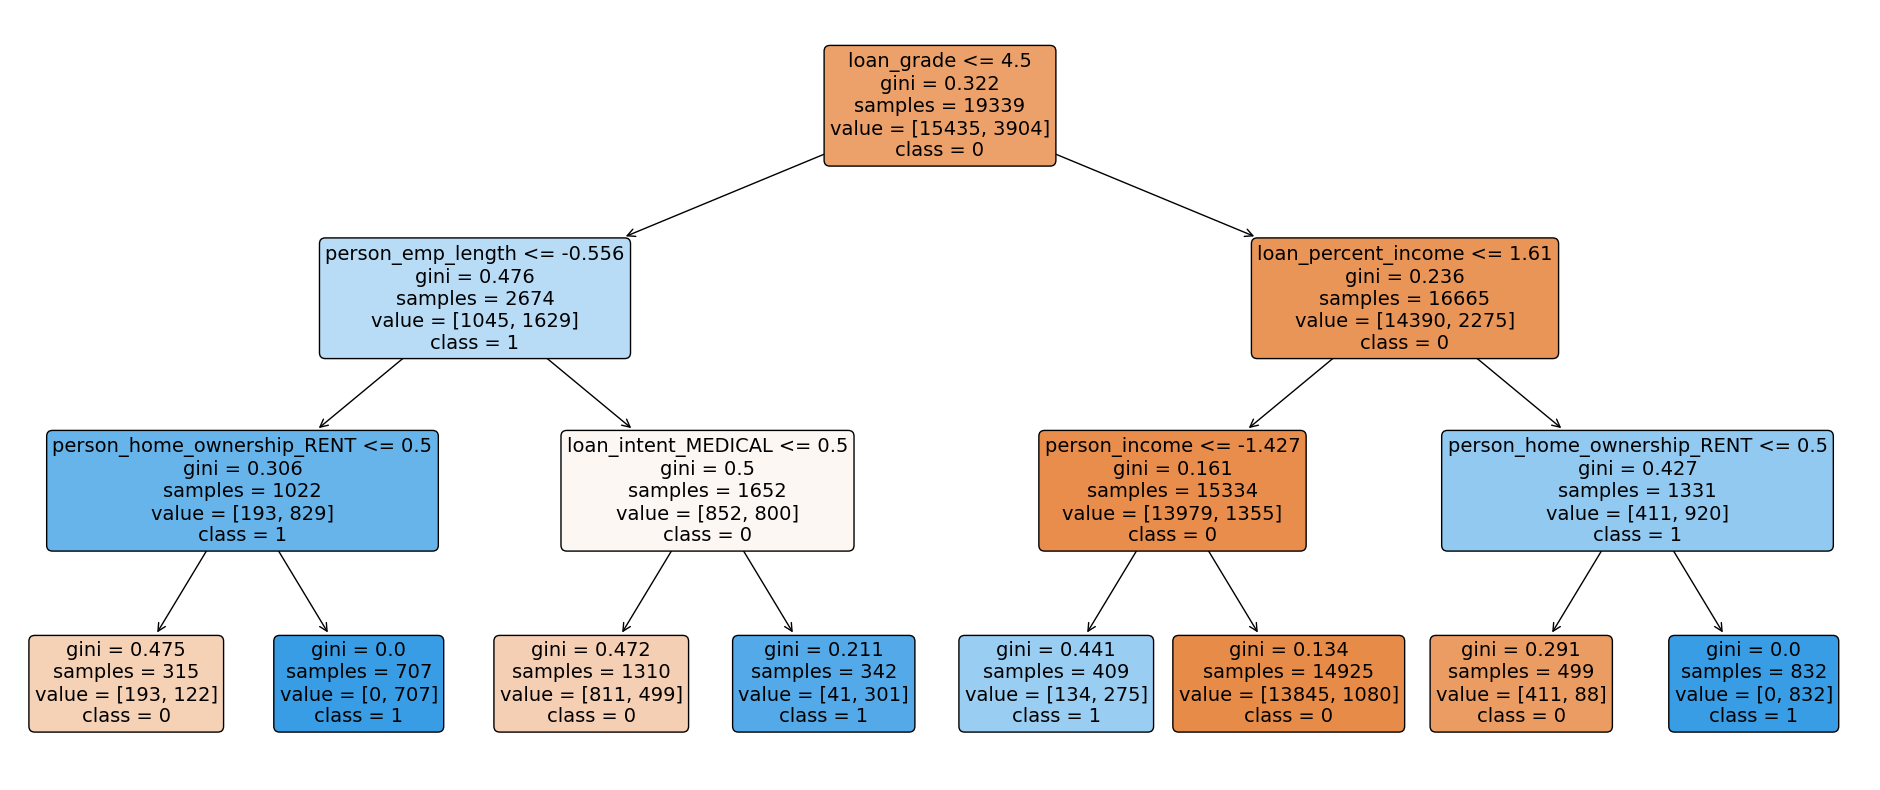

In [89]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,10))
f=plot_tree(classifier,feature_names=X_train_transform.columns,
            class_names=['0','1'],filled=True,fontsize=14,rounded=True)
plt.show()

In [92]:
classifier.feature_importances_

array([0.        , 0.09356709, 0.04404892, 0.        , 0.        ,
       0.2905776 , 0.        , 0.        , 0.        , 0.19155737,
       0.        , 0.        , 0.04412273, 0.        , 0.        ,
       0.        , 0.33612629])

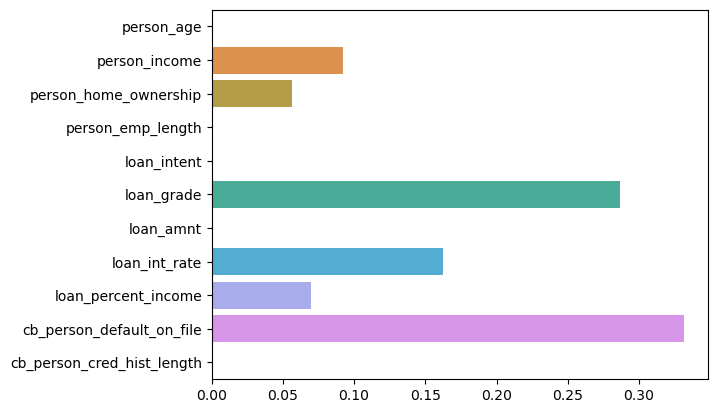

In [118]:
plt.figsize=(24,10)
sns.barplot(x=classifier.feature_importances_,y=X_train.columns)
plt.show()

# DT using labelencoding

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_transform,y_train)

y_test_predict=classifier.predict(X_test_transform)
metrics.accuracy_score(y_test,y_test_predict)

0.8873894834806887

In [25]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [148]:
df.shape

(25786, 12)

In [96]:
# step-1
y=df['loan_status']
X=df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]

In [97]:
# step-2.1
# spliting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [98]:
# step-2.2
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
6970,22,105500,6.0,6000,11.99,0.06,4
23863,30,66500,5.0,8000,7.88,0.12,9
5499,22,61000,2.0,5000,7.66,0.08,3
21389,29,48000,3.0,17375,14.27,0.36,5
28607,34,30000,4.0,4300,7.90,0.14,9


In [99]:
# step-2.3 
X_train_obj=X_train.select_dtypes(include=['object'])
X_train_obj.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
6970,RENT,EDUCATION,B,N
23863,MORTGAGE,DEBTCONSOLIDATION,A,N
5499,RENT,VENTURE,A,N
21389,MORTGAGE,PERSONAL,C,Y
28607,MORTGAGE,PERSONAL,A,N


In [100]:
# step-2.4
X_test_int=X_test.select_dtypes(include=['int64','float64'])
X_test_int.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
7624,21,54000,5.0,20000,10.74,0.37,2
18404,27,21403,2.0,2100,11.12,0.10,7
5215,22,110500,2.0,9000,5.79,0.08,4
15417,20,135000,1.0,15000,15.96,0.11,2
22953,29,60000,1.0,5600,12.42,0.09,10


In [101]:
# step-2.5
X_test_obj=X_test.select_dtypes(include=['object'])
X_test_obj.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
7624,OWN,VENTURE,B,N
18404,MORTGAGE,HOMEIMPROVEMENT,B,N
5215,RENT,EDUCATION,A,N
15417,MORTGAGE,VENTURE,C,Y
22953,MORTGAGE,PERSONAL,B,N


In [102]:
# step-3.1 preprocessing

X_train_obj_le=pd.DataFrame(index=X_train_obj.index)
X_train_obj_le.head()

""
6970
23863
5499
21389
28607


In [103]:
# step-3.2
pho={"OTHER":1,'RENT':2,'MORTGAGE':3,'OWN':4}
X_train_obj_le['person_home_ownership']=X_train_obj['person_home_ownership'].apply(lambda x:pho[x])
X_train_obj_le.head()

,person_home_ownership
6970,2
23863,3
5499,2
21389,3
28607,3


In [104]:
# step-3.3
li={'EDUCATION':1,'VENTURE':2,'PERSONAL':3,'MEDICAL':4,'DEBTCONSOLIDATION':5,'HOMEIMPROVEMENT':6}
X_train_obj_le['loan_intent']=X_train_obj['loan_intent'].apply(lambda x:li[x])
X_train_obj_le.head()

,person_home_ownership,loan_intent
6970,2,1
23863,3,5
5499,2,2
21389,3,3
28607,3,3


In [105]:
# step-3.4
lg={'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}
X_train_obj_le['loan_grade']=X_train_obj['loan_grade'].apply(lambda x:lg[x])
X_train_obj_le.head()

,person_home_ownership,loan_intent,loan_grade
6970,2,1,6
23863,3,5,7
5499,2,2,7
21389,3,3,5
28607,3,3,7


In [106]:
df['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [107]:
# step-3.5
yn={'N':1,'Y':2}
X_train_obj_le['cb_person_default_on_file']=X_train_obj['cb_person_default_on_file'].apply(lambda x:yn[x])
X_train_obj_le.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
6970,2,1,6,1
23863,3,5,7,1
5499,2,2,7,1
21389,3,3,5,2
28607,3,3,7,1


In [108]:
# step-3.6
X_train_transform=pd.concat([X_train_num,X_train_obj_le],axis=1)
X_train_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
6970,22,105500,6.0,6000,11.99,0.06,4,2,1,6,1
23863,30,66500,5.0,8000,7.88,0.12,9,3,5,7,1
5499,22,61000,2.0,5000,7.66,0.08,3,2,2,7,1
21389,29,48000,3.0,17375,14.27,0.36,5,3,3,5,2
28607,34,30000,4.0,4300,7.90,0.14,9,3,3,7,1


In [109]:
# step-4
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train_transform,y_train)

DecisionTreeClassifier(max_depth=3)

In [110]:
# step-5.1
X_test_obj_le=pd.DataFrame(index=X_test_obj.index)
X_test_obj_le.head()

""
7624
18404
5215
15417
22953


In [111]:
# step-5.2
X_test_obj_le['person_home_ownership']=X_test_obj['person_home_ownership'].apply(lambda x:pho[x])
X_test_obj_le['loan_intent']=X_test_obj['loan_intent'].apply(lambda x:li[x])
X_test_obj_le['loan_grade']=X_test_obj['loan_grade'].apply(lambda x:lg[x])
X_test_obj_le['cb_person_default_on_file']=X_test_obj['cb_person_default_on_file'].apply(lambda x:yn[x])
X_test_obj_le.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
7624,4,2,6,1
18404,3,6,6,1
5215,2,1,7,1
15417,3,2,5,2
22953,3,3,6,1


In [112]:
# step-5.3
X_test_transform=pd.concat([X_test_int,X_test_obj_le],axis=1)
X_test_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
7624,21,54000,5.0,20000,10.74,0.37,2,4,2,6,1
18404,27,21403,2.0,2100,11.12,0.10,7,3,6,6,1
5215,22,110500,2.0,9000,5.79,0.08,4,2,1,7,1
15417,20,135000,1.0,15000,15.96,0.11,2,3,2,5,2
22953,29,60000,1.0,5600,12.42,0.09,10,3,3,6,1


In [113]:
# step-6
y_test_predict=classifier.predict(X_test_transform)

In [114]:
# step-7
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_predict)

0.902900573910346

# Tree plot

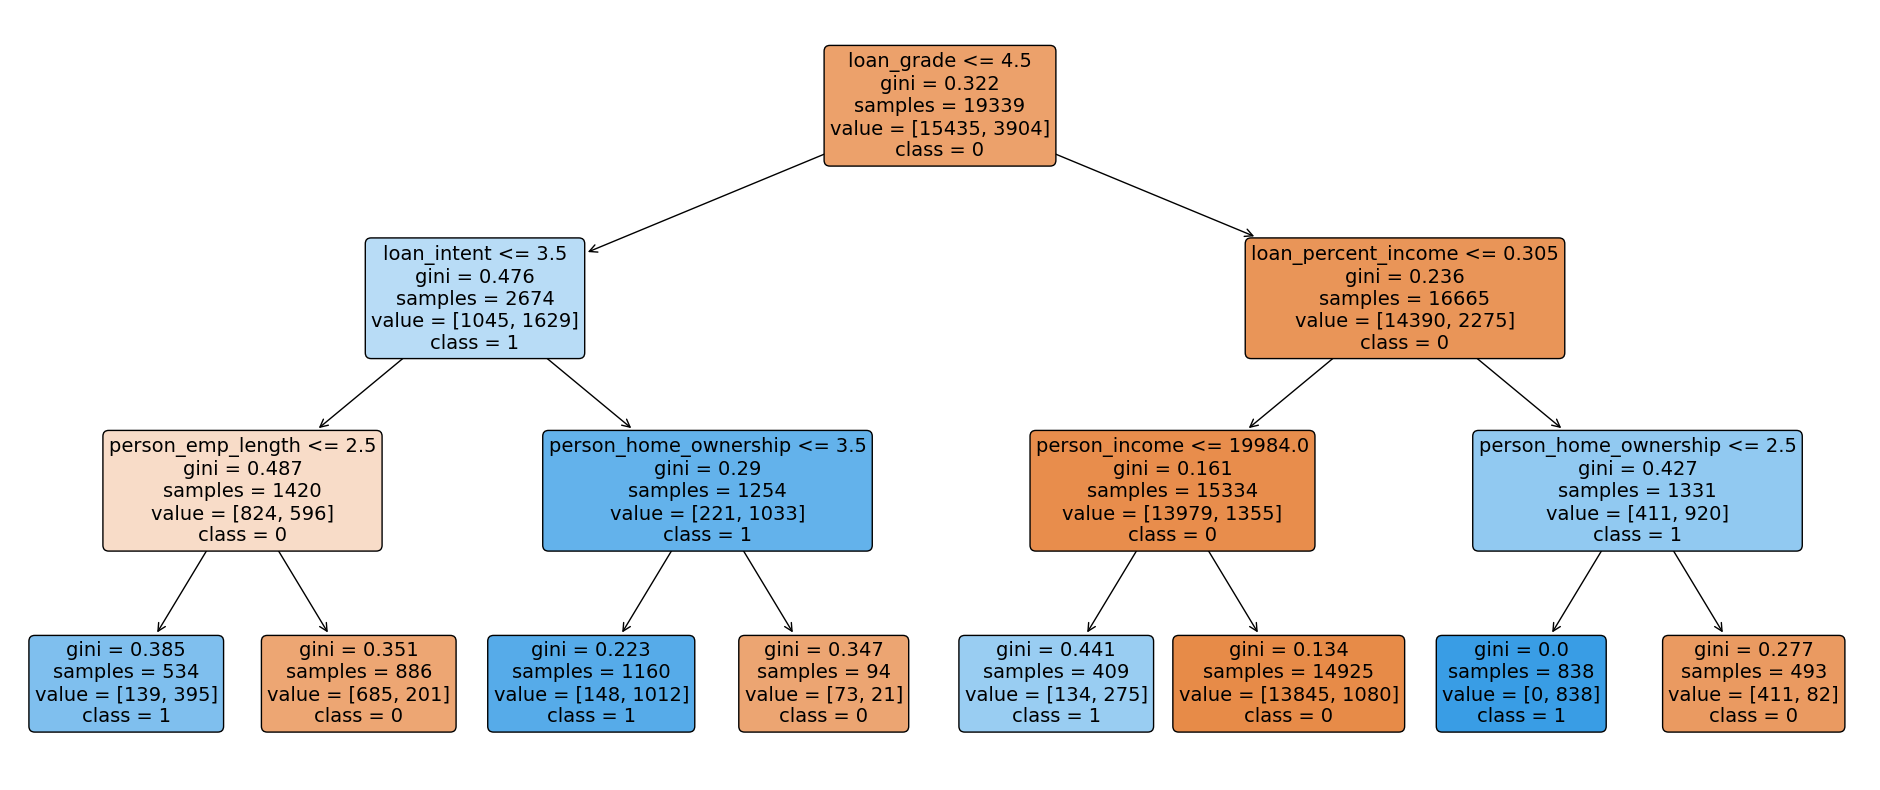

In [115]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,10))
f=plot_tree(classifier,feature_names=X_train_transform.columns,class_names=['0','1'],filled=True,rounded=True,fontsize=14)
plt.show()

In [116]:
classifier.feature_importances_

array([0.        , 0.09234729, 0.0564641 , 0.        , 0.        ,
       0.28678946, 0.        , 0.16260441, 0.0700504 , 0.33174435,
       0.        ])

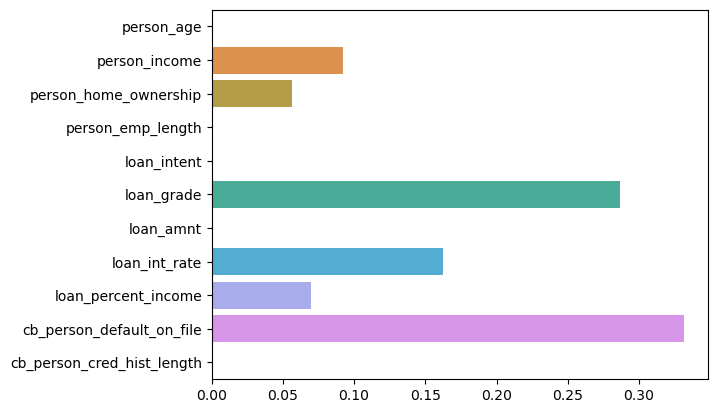

In [117]:
plt.figsize=(15,7)
sns.barplot(x=classifier.feature_importances_,y=X_train.columns)
plt.show()